# Experiments for online calibration for electricity

## 1 Reading the electricity dataset

First we will read the dataset.
Uncomment the shuffling commands for the supplementary material (Figure S.3).

In [1]:
# Parameters:
N_train = 10000  # the size of the training set

import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
electricity = fetch_openml(name='electricity', version=1)
# rg = np.random.default_rng(2021)
# rg.shuffle(electricity.data)     # permute the objects
N_total = electricity.data.shape[0]   # the size of the dataset
N_test = N_total - N_train

# Other views of the data:
X_train = electricity.data[0:N_train]  # matrix of training objects
yy_train = electricity.target[0:N_train]    # vector of training labels (UP or DOWN)
X_test = electricity.data[N_train:]   # matrix of test objects
yy_test = electricity.target[N_train:]     # vector of test labels (UP or DOWN)

# turning the labels into 0 (DOWN) or 1 (UP)
y_train = np.empty(N_train)
y_test = np.empty(N_test)
for i in range(N_train):
  if yy_train[i]=="UP":
    y_train[i] = 1
  else:
    y_train[i] = 0
for i in range(N_test):
  if yy_test[i]=="UP":
    y_test[i] = 1
  else:
    y_test[i] = 0

print("Percentage of UP in the training set:", np.sum(y_train)/N_train)
print("Percentage of UP in the test set:", np.sum(y_test)/N_test)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Percentage of UP in the training set: 0.4333
Percentage of UP in the test set: 0.42206615314907114
Time elapsed: 1.5805647373199463


In [2]:
print(electricity.DESCR)

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the 

Now let us normalize the feature by applying StandardScaler.
(This does not change the results.)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2 Basic preformance for the electricity dataset

Let us use the standard prediction algorithms in scikit-learn.

In the figures, we use Random Forest for this dataset.

### 1.1 Neural Nets

First Neural Nets.

In [4]:
start = time.time()

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021).fit(X_train,y_train)
mlp.fit(X_train,y_train)

# Evaluating the quality:
y_pred = mlp.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of errors: 14358
Confusion matrix:
[[20046   362]
 [13996   908]]
Time elapsed: 23.94252634048462


C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 1.2 Support Vector Machines

We only use the kernel (not linear) SVM.

In [5]:
start = time.time()

from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)  # max_iter default=1000

# Evaluating the quality:
y_pred = svm.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 14425
Confusion matrix:
[[20338    70]
 [14355   549]]
Time elapsed: 8.091676712036133


### 1.3 Decision Trees

In [6]:
start = time.time()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Evaluating the quality:
y_pred = tree.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9318
Confusion matrix:
[[18307  2101]
 [ 7217  7687]]
Time elapsed: 0.11513924598693848


### 1.4 Ensemble methods

First Random Forest.

In [7]:
start = time.time()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = forest.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9184
Confusion matrix:
[[19091  1317]
 [ 7867  7037]]
Time elapsed: 1.0691866874694824


Now Gradient Boosting.

In [8]:
start = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = gb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9165
Confusion matrix:
[[18866  1542]
 [ 7623  7281]]
Time elapsed: 0.9256107807159424


### 1.5 Naive Bayes

In [9]:
start = time.time()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train,y_train)

# Evaluating the quality:
y_pred = nb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 15233
Confusion matrix:
[[16969  3439]
 [11794  3110]]
Time elapsed: 0.0707700252532959


### 1.6 Logistic regression

In [10]:
start = time.time()

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = logistic.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 23050
Confusion matrix:
[[ 2822 17586]
 [ 5464  9440]]
Time elapsed: 0.04724311828613281


## 2 The log loss of standard algorithms

We will use Random Forest in this paper for all figures.

We need to modify the log loss function, as in scikit-learn (but for a different $\epsilon$).
Let us also define the Bernoulli distribution.

In [11]:
epsilon = 10**(-2)  # the safety threshold for the log loss function
def truncate(p):
  if p<epsilon:
    return epsilon
  else:
    if p>1-epsilon:
      return 1-epsilon
    else:
      return p
# The Bernoulli distribution:
def Bern(p,y):  # y is 0 or 1
  if y==1:
    return p
  else:
    return 1-p

First Neural Nets.

In [12]:
start = time.time()

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021).fit(X_train,y_train)

# Evaluating the quality:
y_pred = mlp.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = mlp.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of errors: 14358 out of 35312
465071.51000828407 with 11495 infinities; modified loss: 65763.17740980198
Time elapsed: 11.54547119140625


Now SVM.

In [13]:
start = time.time()

from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)  # max_iter default=1000

# Evaluating the quality:
y_pred = svm.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = svm.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 14425 out of 35312
23533.699064248012 with 0 infinities; modified loss: 23533.699064248012
Time elapsed: 20.761192560195923


Next Decision Trees.

In [14]:
start = time.time()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = tree.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = tree.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9372 out of 35312
0.0 with 9372 infinities; modified loss: 43420.360695127994
Time elapsed: 0.16579842567443848


Next Gradient Boosting.

In [15]:
start = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = gb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = gb.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9165 out of 35312
38847.302275645096 with 0 infinities; modified loss: 35152.270758520484
Time elapsed: 1.0819759368896484


Next Naive Bayes.

<font color='red'>There big problems with this dataset and this and next algorithms.</font>
For this one, the probabilities produced by predict_proba disagree with the point predictions.

In [16]:
start = time.time()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train,y_train)

# Evaluating the quality:
y_pred = nb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = nb.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  if y_pred[n]==0 and (p_pred[n]>0.5) and (n<7450):  # discrepancies among the first 7500 predictions
    print("discrepancy in predictions (point 0, probabilistic 1):",n,y_pred[n],p_pred[n],y_test[n])
  if y_pred[n]==1 and (p_pred[n]<0.5) and (n<7450):  # discrepancies among the first 7500 predictions
    print("discrepancy in predictions (point 1, probabilistic 0):",n,y_pred[n],p_pred[n],y_test[n])
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted!')
    if y_test[n]==1:
      num_errors += 1
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print(num_errors,"errors")

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 15233 out of 35312
discrepancy in predictions (point 0, probabilistic 1): 7424 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7425 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7426 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7427 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7428 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7429 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7430 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7431 0.0 1.0 1.0
discrepancy in predictions (point 0, probabilistic 1): 7432 0.0 1.0 1.0
discrepancy in predictions (point 0, probabilistic 1): 7433 0.0 1.0 1.0
discrepancy in predictions (point 0, probabilistic 1): 7434 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7435 0.0 1.0 0.0
discrepancy in predictions (point 0, probabilistic 1): 7436 0.0 1.0 0.0
discrepancy in predictions 

Next, Logistic Regression.

In [17]:
start = time.time()

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = logistic.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = logistic.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 23050 out of 35312
53595.96111213938 with 19483 infinities; modified loss: 105782.22614943127
Time elapsed: 0.16180133819580078


Finally, Random Forest.

In [18]:
start = time.time()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = forest.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = forest.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9184 out of 35312
10055.69085644122 with 174 infinities; modified loss: 10415.515114275957
Time elapsed: 1.4421536922454834


## 3 Choosing the calibrating functions

First quadratic calibrating functions.
(For use in the supplementary material, the right panel of Figure S.1.)

In [19]:
# The quadratic calibrator:
def quad_cal(p,theta):
  return p + theta*p*(1-p)

# The cubic calibrator:
def cub_cal(p,a,b):
  return p + a*p*(p-b)*(p-1)

# My family of calibrators:
Ncal = 5  # the number of calibrators
def my_cal(p,k):  # my calibrators (quadratic)
  if k==0:
    return quad_cal(p,0)
  if k==1:
    return quad_cal(p,1)
  if k==2:
    return quad_cal(p,-1)
  if k==3:
    return quad_cal(p,0.5)
  if k==4:
    return quad_cal(p,-0.5)
  else:
    print("my_cal failure")

Now Cox's family.

In [20]:
alphas = [0, -1, 1]  # make sure to start from 0 (the neutral value)
betas = [1, 0.5, 2]  # make sure to start from 1 (the neutral value)
Ncal_alpha = len(alphas) # the number of alpha calibrators
Ncal_beta = len(betas) # the number of beta calibrators
Ncal = Ncal_alpha * Ncal_beta  # the total number of calibrators

def Cox(p,alpha,beta):
  return p**beta*np.exp(alpha) / (p**beta*np.exp(alpha) + (1-p)**beta)

def set_theta(index):  # finding theta=(alpha,beta) from its index
  result = np.empty(2)  # initializing the result
  current_index = index
  result[0] = current_index % Ncal_alpha  # alpha is at index 0
  current_index = current_index // Ncal_alpha
  result[1] = current_index % Ncal_beta  # beta is at index 1
  current_index = current_index // Ncal_beta
  if current_index!=0:
    print('Error')
  return result

def my_cal(p,k):  # exactly as in OCM 32
  theta = set_theta(k)
  return Cox(p,theta[0],theta[1])

## 4 Our test martingales

The following cell implements the Composite Jumper (CJ) martingale (Figure 5).
After slight editing (see the instructions in the comments),
it can be used for drawing several Simple Jumper (SJ) martingales,
as in the right panel of Figure S.5 in the supplementary material.

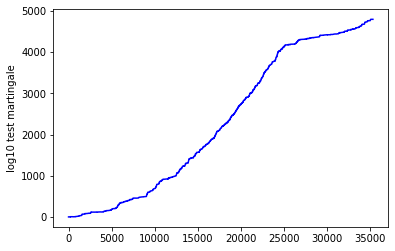

Final values of SJs on the log scale: [4795.55321764 4299.15521155 3923.92009504]
Final value of CJ on the log scale: 4794.775066388108
Time elapsed: 12.356814861297607


In [21]:
import time   # for timing
start = time.time()

# Parameters
# pi = 0.5  # the passive weight; pi=0.5 is assumed but not used explicitly
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates; canonical: 0.01, 0.001, 0.0001
NJ = len(Jrates)

# The calibrators were defined in Section 3.

# Arithmetic average of numbers given on the log10 scale:
def log_mean(x):
  n = len(x)
  m = np.max(x)
  return m+np.log10(np.mean(np.exp(np.log(10)*(x-m))))

# initializing the SJ and CJ test martingales on the log scale (including the initial value of 0):
log_SJ_martingale = np.zeros((NJ,(N_test+1)))
log_CJ_martingale = np.zeros(N_test+1)

# Processing the dataset
for J_index in range(NJ):  # going over all jumping rates
  Jrate = Jrates[J_index]  # the current jumping rate
  MartCap = np.zeros(Ncal)  # the normalized capital in each state (after normalization at the previous step)
  MartCap[0] = 1  # the initial distribution for each jumping rate is uniform
  for n in range(N_test):
    # Jump mixing starts
    Capital = np.sum(MartCap[:])  # redundant; we know that Capital = 1 at this point
    MartCap[:] = (1-Jrate)*MartCap[:] + (Jrate/Ncal)*Capital
    # Jump mixing ends
    ppp = truncate(p_pred[n])   # base prediction
    for k in range(Ncal):
      new_ppp = my_cal(ppp,k)    # our new prediction
      # at this point we know that Bern(ppp,y_test[n])!=0
      MartCap[k] *= Bern(new_ppp,y_test[n]) / Bern(ppp,y_test[n])
    increase = np.sum(MartCap[:])   # relative increase in my capital
    log_SJ_martingale[J_index,n+1] = log_SJ_martingale[J_index,n] + np.log10(increase)
    MartCap[:] /= increase
  # plt.plot(log_SJ_martingale[J_index,:],label='jumping rate: '+str(Jrate))  # for SJ martingales

for n in range(N_test+1):
  log_CJ_martingale[n] = log_mean([1,log_mean(log_SJ_martingale[:,n])])

plt.plot(log_CJ_martingale,c='b')   # for CJ martingale
plt.ylabel('log10 test martingale')  # choose singular or plural
# plt.legend()  # for SJ martingales
# plt.savefig("el_SJs.pdf", bbox_inches='tight')
plt.show()

# Interesting values for the caption or text:
print("Final values of SJs on the log scale:", log_SJ_martingale[:,N_test])
print("Final value of CJ on the log scale:", log_CJ_martingale[N_test])

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

## 5 Turning the test martingale into a predictive system

The following cell implements Algorithm 2 with $\pi=0$ and for a fixed jumping rate J.
Not used in the paper.

In [22]:
import time   # for timing
start = time.time()

# Parameters
Jrate = 0.01  # the jumping rate

# The calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
weight = np.ones(Ncal)  # the weight of each state
for n in range(N_test):
  # Jump mixing starts
  Capital = np.sum(weight[:])
  weight[:] /= Capital  # normalization
  weight[:] = (1-Jrate)*weight[:] + Jrate/Ncal
  # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = 0    # initializing the new prediction
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    new_ppp += cal_ppp_k * weight[k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    weight[k] *= Bern(cal_ppp_k,y_test[n])

cum_loss = 0  # initialization of the loss of the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Base:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

cum_loss = 0  # initialization of the loss of the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss (not used)
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Protected:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Base: 10055.69085644122 with 174 infinities; modified loss: 10415.515114275957
Protected: 5618.261530959309 with 0 infinities; modified loss: 5620.196364080597
Time elapsed: 4.905060768127441


Next we implement Algorithm 2 for $\pi=0.5$ and for a range of jumping rates.
This is used for Figure 6.

In [23]:
import time   # for timing
start = time.time()

# Parameters
pi = 0.5  # the prior weight of the passive elementary predictor
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates
NJ = len(Jrates)

# Calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
P_weight = pi    # amount set aside (passive weight)
A_weight = np.zeros((NJ,Ncal))  # the weight of each active state
A_weight[:,0] = 1/NJ    # initial weights
# A_weight[:,0] = (1-pi)/NJ    # initial weights
for n in range(N_test):  # going through all test observations
  # Jump mixing starts
  for J_index in range(NJ):
    Capital = np.sum(A_weight[J_index,:])  # active capital for this jumping rate
    Jrate = Jrates[J_index]
    A_weight[J_index,:] = (1-Jrate)*A_weight[J_index,:] + Capital*Jrate/Ncal
  # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = ppp*P_weight     # initializing the new prediction to its passive component
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      new_ppp += cal_ppp_k * A_weight[J_index,k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp   # my prediction
  P_weight *= Bern(ppp,y_test[n])  # updating the passive capital
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      A_weight[J_index,k] *= Bern(cal_ppp_k,y_test[n])  # updating the active capital
  Capital = P_weight  # initializing the overall capital to the passive capital
  for k in range(Ncal):
    for J_index in range(NJ):
      Capital += A_weight[J_index,k]  # accumulating the overall capital
  P_weight /= Capital  # normalization of the passive weight
  A_weight[:,:] /= Capital  # normalization of the active weights

cum_loss = 0  # initialization of the log10 loss of the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted by base!')
    if y_test[n]==1:  # in the case of a tie, I predict 0
      num_errors += 1
print("Base:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print("Base:",num_errors,"errors")

cum_loss = 0  # initialization of the log10 loss of the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted by protected!')
    if y_test[n]==1:
      num_errors += 1
print("Protected:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print("Protected:",num_errors,"errors")

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Base: 10055.69085644122 with 174 infini

Now let us draw the ROC curves.
Used for various figures in the main paper and supplementary material.

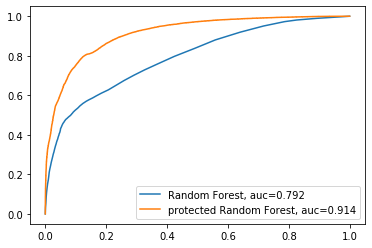

In [24]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, p_pred)
auc = metrics.roc_auc_score(y_test, p_pred)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(np.around(auc,decimals=3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, p_prime)
auc = metrics.roc_auc_score(y_test, p_prime)
plt.plot(fpr,tpr,label="protected Random Forest, auc="+str(np.around(auc,decimals=3)))
plt.legend()
# plt.savefig("el_ROC.pdf", bbox_inches='tight')
plt.show()

## 6 Prediction with limited feedback

Now we assume that feedback is given every $K$th test observation.
This is used for Figure S.8 in the supplementary material.

In [25]:
import time   # for timing
start = time.time()

# Parameters
pi = 0.5  # the prior weight of the passive elementary predictor
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates
K = 100   # how often feedback is given (10 or 100 in the paper)

NJ = len(Jrates)

# Calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
P_weight = pi    # amount set aside (passive weight)
A_weight = np.zeros((NJ,Ncal))  # the weight of each active state
A_weight[:,0] = (1-pi)/NJ    # initial weights
for n in range(N_test):  # going through all test observations
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = ppp*P_weight    # initializing the new prediction to its passive component
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      new_ppp += cal_ppp_k * A_weight[J_index,k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp   # protected prediction
  if n%K==0:   # if n is divisible by K
    # Jump mixing starts
    for J_index in range(NJ):
      Capital = np.sum(A_weight[J_index,:])  # active capital for this jumping rate
      Jrate = Jrates[J_index]
      A_weight[J_index,:] = (1-Jrate)*A_weight[J_index,:] + Capital*Jrate/Ncal
    # Jump mixing ends
    P_weight *= Bern(ppp,y_test[n])  # updating the passive capital
    for k in range(Ncal):
      cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
      for J_index in range(NJ):
        A_weight[J_index,k] *= Bern(cal_ppp_k,y_test[n])  # updating the active capital
    Capital = P_weight + np.sum(A_weight[:,:])  # the overall weight
    P_weight /= Capital  # normalization of the passive weight
    A_weight[:,:] /= Capital  # normalization of the active weights

cum_loss = 0  # initialization of the log10 loss of the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Base:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

cum_loss = 0  # initialization of the log10 loss of the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Protected:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Base: 10055.69085644122 with 174 infinities; modified loss: 10415.515114275957
Protected: 8561.094391871746 with 0 infinities; modified loss: 8561.104668991495
Time elapsed: 3.080016851425171


## 7 Behaviour of the labels

Now let us see the moving average of the labels, ignoring the objects.
This cell is used for producing the right panel of Figure S.4 in the supplementary material.

Percentage of ups: 0.4245453742937853


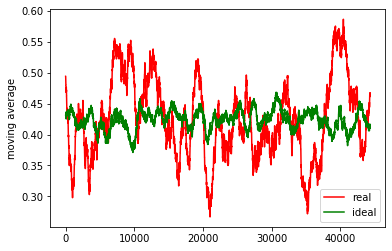

Time elapsed: 1.1202301979064941


In [26]:
window = 1000  # how many labels to average

import time
start = time.time()

N_total = electricity.data.shape[0]   # the size of the dataset (recomputing)

# Other view of the data:
yy_total = electricity.target[0:N_total]    # vector of all labels (UP or DOWN)

# turning the labels into 0 (DOWN) or 1 (UP)
y_total = np.empty(N_total)
for n in range(N_total):
  if yy_total[n]=="UP":
    y_total[n] = 1
  else:
    y_total[n] = 0

# Simulating artificial (ideal) data:
percentage = np.mean(y_total)
print("Percentage of ups:", percentage)
rg = np.random.default_rng(2021)
y_ideal_raw = rg.random(N_total)  # uniformly distributed random numbers
y_ideal = np.empty(N_total)
for n in range(N_total):
  if y_ideal_raw[n]<percentage:
    y_ideal[n] = 1
  else:
    y_ideal[n] = 0

MA_real = np.empty(N_total-window+1)  # initializing the real moving average
MA_ideal = np.empty(N_total-window+1)  # initializing the real moving average

for n in range(N_total-window+1):
  MA_real[n] = np.mean(y_total[n:(n+window)])
  MA_ideal[n] = np.mean(y_ideal[n:(n+window)])

plt.plot(MA_real,c='r',label='real')
plt.plot(MA_ideal,c='g',label='ideal')
plt.ylabel('moving average')
plt.legend()
# plt.savefig("el_MA.pdf", bbox_inches='tight')
plt.show()

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

## 8 Dealing with the time series aspect (only in the supplementary material)

Finally, let us add some prehistory.
This cell is for producing the right panel of Figure S.9 in the supplementary material
(in combination with cells above).

In [27]:
# Parameters:
N_train = 10000  # the size of the training set
PH_size = 48  # the size of prehistory (in the paper: 48)

import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
electricity = fetch_openml(name='electricity', version=1)
N_full = electricity.data.shape[0]   # the full size of the dataset
N_total = N_full - PH_size  # the total size of the dataset with prehistory
N_test = N_total - N_train  # the size of the test set
N_old_features = electricity.data.shape[1]   # the number of features in the existing dataset
N_features = N_old_features + PH_size  # the new number of features (with prehistory)

X_full = electricity.data[:]    # matrix of all objects
yy_full = electricity.target[:] # vector of all labels (UP or DOWN)

# turning the labels into 0 (DOWN) or 1 (UP)
y_full = np.empty(N_full)
for i in range(N_full):
  if yy_full[i]=="UP":
    y_full[i] = 1
  else:
    y_full[i] = 0

# adding pre-history of size PH
X_total = np.empty((N_total,N_features))
for i in range(N_total):
  X_total[i,0:N_old_features] = X_full[i+PH_size,:]   # the old features
  X_total[i,N_old_features:N_features] = y_full[i:(i+PH_size)]  # the prehistory

# Other views of the data:
X_train = X_total[0:N_train]   # matrix of training objects
y_train = y_full[PH_size:(PH_size+N_train)] # vector of training labels (0 or 1)
X_test = X_total[N_train:]   # matrix of test objects
y_test = y_full[(PH_size+N_train):] # vector of test labels (0 or 1)

print("Percentage of UP in the training set:", np.mean(y_train))
print("Percentage of UP in the test set:", np.mean(y_test))

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Percentage of UP in the training set: 0.4345
Percentage of UP in the test set: 0.42170485480943737
Time elapsed: 0.4977536201477051
